# Introduction to Keras

Thomas Boquet: [@tboquet](https://github.com/tboquet) on github

##### 1. How to choose a deep learning library?
##### 2. Libraries landscape
##### 3. What is Keras?
##### 4. Why Keras?
##### 5. Sequential API
##### 6. Functionnal API
##### 7. Conclusion
##### 8. Other ressources

# How to choose a deep learning library?

Before:

- be familiar with the underlying concepts covered by the tool
- think about your goals (research, production, learning) 

Main concerns:

- supported and used by a lot of people
- already in production in some companies
- will be alive for several years
- active contributors


# Libraries landscape?

TODO: links
- Lasagne (Theano)
- Blocks (Theano)
- Pretty tensor (TensorFlow)
- Skflow (TensorFlow)
- MxNet (MxNet backend)
- Cunn, nn, autograd (Torch, CuTorch)
- Darknet (Darknet backend)
- etc.

# What is Keras? 

- "Keras is a high-level neural networks library, written in Python and capable of running on top of either TensorFlow or Theano"
- different from Theano, Tensorflow, Neon
- Keras has its own backend wrapping these 2 libraries
- shorten length between ideas and results, implementation and production

# Tensorflow Backend

In [2]:
def dot(x, y):
    '''Multiplies 2 tensors.
    When attempting to multiply a ND tensor
    with a ND tensor, reproduces the Theano behavior
    (e.g. (2, 3).(4, 3, 5) = (2, 4, 5))
    '''
    if ndim(x) is not None and (ndim(x) > 2 or ndim(y) > 2):
        x_shape = (-1,) + int_shape(x)[1:]
        y_shape = int_shape(y)
        y_permute_dim = list(range(ndim(y)))
        y_permute_dim = [y_permute_dim.pop(-2)] + y_permute_dim
        xt = tf.reshape(x, [-1, x_shape[-1]])
        yt = tf.reshape(tf.transpose(y, perm=y_permute_dim), [y_shape[-2], -1])
        return tf.reshape(tf.matmul(xt, yt), x_shape[:-1] + y_shape[:-2] + y_shape[-1:])
    if is_sparse(x):
        out = tf.sparse_tensor_dense_matmul(x, y)
    else:
        out = tf.matmul(x, y)
    return out

# Theano Backend 

In [3]:
def dot(x, y):
    if is_sparse(x):
        return th_sparse_module.basic.structured_dot(x, y)
    else:
        return T.dot(x, y)

# Why Keras?

- simple torch like syntax
- functionnal api (flexible)
- lots of examples and projects built with Keras
- research and production ready
- built-in tools (model and parameters serialization, callbacks, etc.)
- easily abstract ideas

# Sequential API

In [4]:
from keras.models import Sequential

Using TensorFlow backend.


In [34]:
from __future__ import print_function
import numpy as np
np.random.seed(1337)  # for reproducibility

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
import matplotlib.pyplot as plt
plt.style.use('ggplot')

batch_size = 128
nb_classes = 10
nb_epoch = 12

input_shape = (img_rows, img_cols, 1)

# input image dimensions
img_rows, img_cols = 28, 28
# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling
pool_size = (2, 2)
# convolution kernel size
kernel_size = (3, 3)

# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

X_train shape: (60000, 28, 28)
60000 train samples
10000 test samples


In [28]:
X_train_f = X_train.reshape(-1, 28 * 28)
X_test_f = X_test.reshape(-1, 28 * 28)

mult_logistic = Sequential()
mult_logistic.add(Dense(512, input_shape=(28 * 28,), name="hidden_layer_1"))
mult_logistic.add(Dense(256, input_shape=(28 * 28,), name="hidden_layer_2"))
mult_logistic.add(Dense(10, input_shape=(28 * 28,), name="output_layer"))
mult_logistic.add(Activation('softmax'))
mult_logistic.compile(loss='categorical_crossentropy',
                      optimizer='sgd',
                      metrics=['accuracy'])

In [29]:
from IPython.display import Image
from keras.utils.visualize_util import model_to_dot

def vizu_model(model):
    return Image(model_to_dot(model, show_layer_names=True, show_shapes=True).create(prog='dot', format='png'))

Fontconfig warning: ignoring C.UTF-8: not a valid language tag



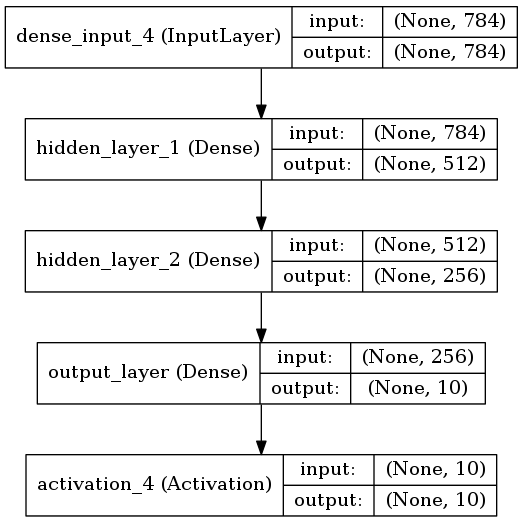

In [30]:
vizu_model(mult_logistic)

In [31]:
history = mult_logistic.fit(X_train_f, Y_train, batch_size=32, nb_epoch=20,
                            verbose=0, validation_data=(X_test_f, Y_test))

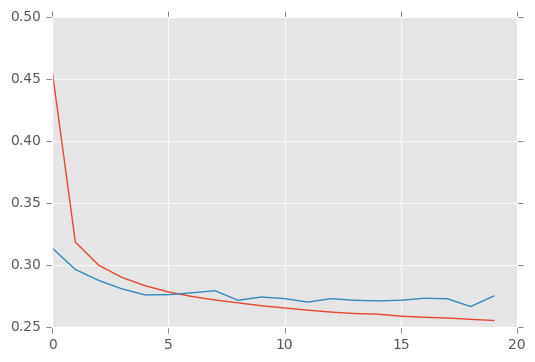

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

# Convnet 

In [36]:
model = Sequential()

model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1],
                        border_mode='valid',
                        input_shape=input_shape))
model.add(Activation('relu'))
model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

model.fit(X_train[:, :, :, None], Y_train, batch_size=batch_size, nb_epoch=nb_epoch,
          verbose=1, validation_data=(X_test[:, :, :, None], Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 87s - loss: 0.4100 - acc: 0.8745 - val_loss: 0.1062 - val_acc: 0.9658
Epoch 2/12
60000/60000 [==============================] - 78s - loss: 0.1501 - acc: 0.9550 - val_loss: 0.0670 - val_acc: 0.9788
Epoch 3/12
60000/60000 [==============================] - 107s - loss: 0.1125 - acc: 0.9662 - val_loss: 0.0527 - val_acc: 0.9831
Epoch 4/12
60000/60000 [==============================] - 116s - loss: 0.0927 - acc: 0.9719 - val_loss: 0.0458 - val_acc: 0.9850
Epoch 5/12
60000/60000 [==============================] - 115s - loss: 0.0820 - acc: 0.9761 - val_loss: 0.0409 - val_acc: 0.9868
Epoch 6/12
60000/60000 [==============================] - 116s - loss: 0.0730 - acc: 0.9785 - val_loss: 0.0396 - val_acc: 0.9866
Epoch 7/12
60000/60000 [==============================] - 115s - loss: 0.0657 - acc: 0.9811 - val_loss: 0.0377 - val_acc: 0.9882
Epoch 8/12
60000/60000 [=========================

# Functionnal API 

# Conclusion

# Ressources 

- [examples from the library](https://github.com/fchollet/keras/tree/master/examples)
- [keras-ressources](https://github.com/fchollet/keras-resources)
- [keras-blog](https://blog.keras.io/)
- [Deep learning with Keras (Tutorial @ EuroScipy 2016)](https://github.com/leriomaggio/deep-learning-keras-tensorflow)
- [Deep Learning: Keras Short Tutorial [video]](https://www.youtube.com/watch?v=Tp3SaRbql4k)